# # how to handel outliers
#(1).trimming
#(2).trapping

In [5]:
import numpy as np 
import pandas as pd

In [6]:
df=pd.read_csv("C:\\Users\\us\\OneDrive\\Desktop\\regexml\\Newplacement.csv")

In [7]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [8]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\us\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\us\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


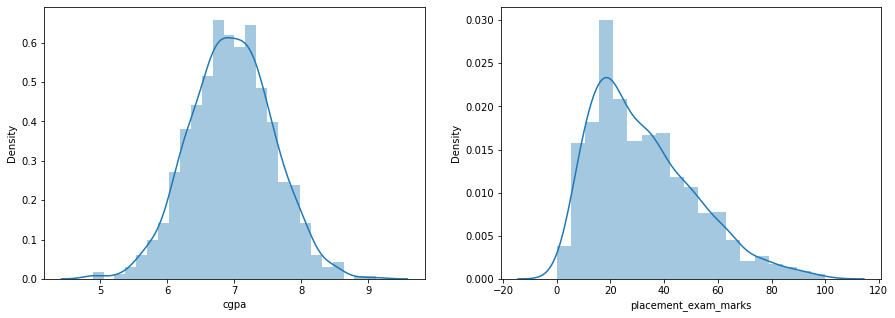

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['cgpa'])
plt.subplot(122)
sns.distplot(df['placement_exam_marks'])
plt.show()

C:\Users\us\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

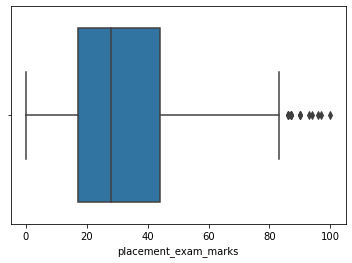

In [11]:
sns.boxplot(df['placement_exam_marks'])

In [13]:
#FINDING THE IQR
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [14]:
percentile25

17.0

In [15]:
percentile75

44.0

In [17]:
IQR=percentile75-percentile25
IQR

27.0

In [18]:
upper_limit=percentile75 + 1.5*IQR
upper_limit

84.5

In [19]:
lower_limit=percentile25 - 1.5*IQR
lower_limit

-23.5

# FINDING OUT OUTLIERS

In [20]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [22]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


# TRIMMING

In [23]:
#OUTLIER REMOVING TECHNIQUE 1

In [25]:
newdf=df[df['placement_exam_marks']<upper_limit]
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [26]:
#COMPARISON

C:\Users\us\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\us\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\us\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

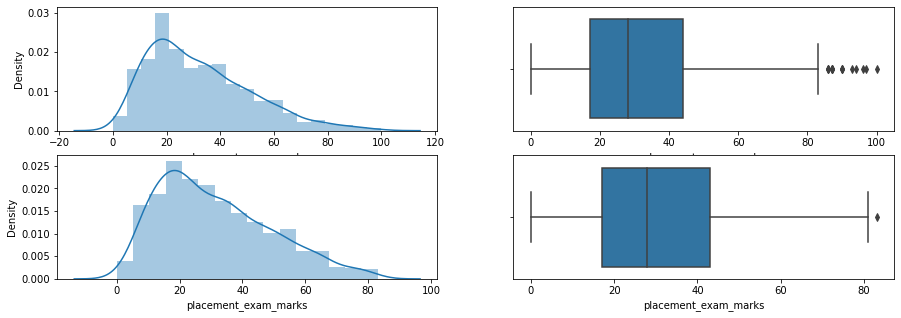

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])


plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])


plt.subplot(223)
sns.distplot(newdf['placement_exam_marks'])



plt.subplot(224)
sns.boxplot(newdf['placement_exam_marks'])

plt.show()

# capping(outlier removing technique 2)

In [31]:
new_df_cap=df.copy()

In [32]:
#min=5 , max=15
#min=4 , 3 , 1
#max=20 , 30 , 50
#updated_min_value=1
#updated_max_value

In [33]:
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    
    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks'])
)

In [34]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [35]:
new_df_cap.shape

(1000, 3)

C:\Users\us\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\us\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\us\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

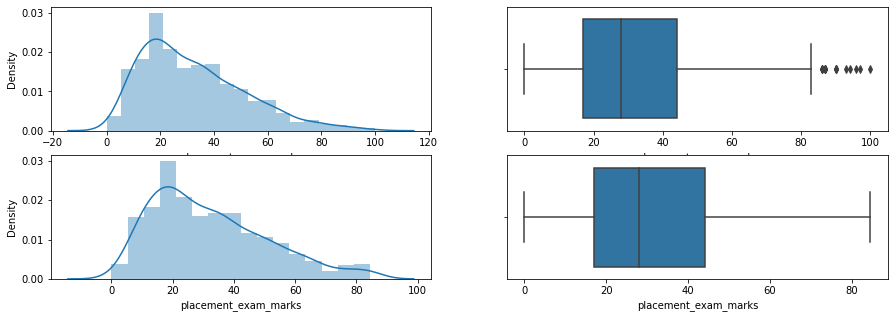

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])


plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])


plt.subplot(223)
sns.distplot(new_df_cap['placement_exam_marks'])



plt.subplot(224)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()